In [2]:
import numpy as np
import pandas as pd


In [3]:
DATA_DIR = 'C:/Users/enoch/Documents/GitHub/caltech-twin/digitaltwin/bms_csv_data/cleaned_data/'  # subfolders for each meter, raw data here
data = pd.read_csv('C:/Users/enoch/Documents/GitHub/caltech-twin/digitaltwin/bms_inventory.csv') 
data

,Single Line Building Name,Building String,Building code,Building Number,Caltech Building List Name,Substation,Jace,Meter Name (unmodified),Meter Name,Meter Description,Notes,Query Base,Measurements,Measurements Cleaned
0,Alles,kerckhoffAlles,AL28,28.0,ALLES LABORATORY,Substation 1,AL28_1,BTU_CHW_028_B1_1,BTU_CHW_1,C021 Meters AL28 Chilled Water,NaN,https://192.168.10.104/webChart/query/data/his...,"['FlowRate', 'SupplyTemp', 'EnergyRate', 'Retu...","['FlowRate', 'SupplyTemp', 'EnergyRate', 'Retu..."
1,Alles,kerckhoffAlles,AL28,28.0,ALLES LABORATORY,Substation 1,AL28_1,BTU_CHW_027_B1_1,BTU_CHW_2_Kerckhoff,C022 Meters AL28 Chilled Water,NaN,https://192.168.10.104/webChart/query/data/his...,"['FlowRate', 'SupplyTemp', 'EnergyRate', 'Retu...","['FlowRate', 'SupplyTemp', 'EnergyRate', 'Retu..."
2,Alles,kerckhoffAlles,AL28,28.0,ALLES LABORATORY,Substation 1,CR30_1,EM_28_PH_1,EM_28_PH_1,E151 Meters Building AL28,NaN,https://192.168.10.104/webChart/query/data/his...,"['kW', 'kVar', 'kVA', 'AmpsA', 'AmpsB', 'AmpsC...","['kW', 'kVar', 'kVA', 'AmpsA', 'AmpsB', 'AmpsC..."
3,Alles,kerckhoffAlles,AL28,28.0,ALLES LABORATORY,Substation 1,CR30_1,EM_28_PH_2,EM_28_PH_2,E152 Meters Building AL28 Penthouse,NaN,https://192.168.10.104/webChart/query/data/his...,"['kW', 'kVar', 'kVA', 'AmpsA', 'AmpsB', 'AmpsC...","['kW', 'kVar', 'kVA', 'AmpsA', 'AmpsB', 'AmpsC..."
4,Annenberg,annenberg,AN16,16.0,ANNENBERG CENTER,Substation 2,AN16_1,BTU_CHW_016_B1_1,BTU_CHW,C008 Meters AN16 Chilled Water,NaN,https://192.168.10.104/webChart/query/data/his...,"['FlowRate', 'SupplyTemp', 'EnergyRate', 'Retu...","['FlowRate', 'SupplyTemp', 'EnergyRate', 'Retu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Substation 4,substation4,NaN,276.0,SUBSTN 4 CENTRAL PLANT,Substation 4,CA17_3,EM_SUB4_52M1,EM_SUB4_52M1,E190 Meters SUB4_52M1,NaN,https://192.168.10.104/webChart/query/data/his...,"['kW', 'kVar', 'kVA', 'AmpsA', 'AmpsB', 'AmpsC...","['kW', 'kVar', 'kVA', 'AmpsA', 'AmpsB', 'AmpsC..."
261,Substation 4,substation4,NaN,276.0,SUBSTN 4 CENTRAL PLANT,Substation 4,CA17_3,EM_SUB4_52M1_CB_1,EM_SUB4_52M1_CB_1,E207 Meters SUB4_52M1_CB1,NaN,https://192.168.10.104/webChart/query/data/his...,"['kW', 'kVar', 'kVA', 'AmpsA', 'AmpsB', 'AmpsC...","['kW', 'kVar', 'kVA', 'AmpsA', 'AmpsB', 'AmpsC..."
262,Substation 4,substation4,NaN,276.0,SUBSTN 4 CENTRAL PLANT,Substation 4,CA17_3,EM_SUB4_52M2,EM_SUB4_52M2,E191 Meters SUB4_52M2,NaN,https://192.168.10.104/webChart/query/data/his...,"['kW', 'kVar', 'kVA', 'AmpsA', 'AmpsB', 'AmpsC...","['kW', 'kVar', 'kVA', 'AmpsA', 'AmpsB', 'AmpsC..."
263,Substation 4,substation4,NaN,276.0,SUBSTN 4 CENTRAL PLANT,Substation 4,CA17_3,EM_SUB4_52M2_CB_2,EM_SUB4_52M2_CB_2,E208 Meters SUB4_52M2_CB2,NaN,https://192.168.10.104/webChart/query/data/his...,"['kW', 'kVar', 'kVA', 'AmpsA', 'AmpsB', 'AmpsC...","['kW', 'kVar', 'kVA', 'AmpsA', 'AmpsB', 'AmpsC..."


In [4]:
meter = "EM_28_PH_1"
jace = str(data[data['Meter Name'] == meter]['Jace'].values[0])
filename = DATA_DIR  + meter + '/' + jace + '_' + meter + '_PowerFactor.csv'
pf = pd.read_csv(filename)
correct_size = len(pf)
pf = pf[['t','v']]
pf = pf.rename(columns = {'v': meter + '_PowerFactor'})
for meter in data['Meter Name']:
    if "EM" in meter and "EM_28_PH_1" not in meter:
        jace = str(data[data['Meter Name'] == meter]['Jace'].values[0])
        filename = DATA_DIR  + meter + '/' + jace + '_' + meter + '_PowerFactor.csv'
        try:
            df = pd.read_csv(filename)
            if len(df) == correct_size:
                df = df.rename(columns = {'v': meter + '_PowerFactor'})
                df = df[[meter + '_PowerFactor']]
                pf = pd.concat([pf,df], axis = 1)
        except:
            print(meter + " bad")



EM_21_AHU_B2_3 bad


In [5]:
pf

,t,EM_28_PH_1_PowerFactor,EM_28_PH_2_PowerFactor,EM_16_1_A_PowerFactor,EM_16_1_B_PowerFactor,EM_16_1_PV_PowerFactor,EM_25_B2_1_PowerFactor,EM_25_B2_2_PowerFactor,EM_61_1_1_PowerFactor,EM_61_B1_1_PowerFactor,...,EM_SUB4_52F2_CB_5_PowerFactor,EM_SUB4_52F3_PowerFactor,EM_SUB4_52F4_PowerFactor,EM_SUB4_52F4_CB_4_PowerFactor,EM_SUB4_52F4_CB_6_PowerFactor,EM_SUB4_52M1_PowerFactor,EM_SUB4_52M1_CB_1_PowerFactor,EM_SUB4_52M2_PowerFactor,EM_SUB4_52M2_CB_2_PowerFactor,EM_SUB4_52U_PowerFactor
0,2022-03-31T23:45-07:00,0.802,1.000,0.885,1,0,0.806,0.943,-0.863815,0.962,...,-32.768002,-32.768002,-32.768002,-32.768002,-32.768002,0.0,-32.768002,0.0,-32.768002,-32.768002
1,2022-04-01T00:00-07:00,0.818,1.000,0.923,1,0,0.806,0.945,-0.854984,0.967,...,-32.768002,-32.768002,-32.768002,-32.768002,-32.768002,0.0,-32.768002,0.0,-32.768002,-32.768002
2,2022-04-01T00:15-07:00,0.802,1.000,0.941,1,0,0.833,0.967,-0.848760,0.967,...,-32.768002,-32.768002,-32.768002,-32.768002,-32.768002,0.0,-32.768002,0.0,-32.768002,-32.768002
3,2022-04-01T00:30-07:00,0.803,1.000,0.900,1,0,0.823,0.966,-0.856981,0.965,...,-32.768002,-32.768002,-32.768002,-32.768002,-32.768002,0.0,-32.768002,0.0,-32.768002,-32.768002
4,2022-04-01T00:45-07:00,0.811,1.000,0.949,1,0,0.812,0.942,-0.876127,0.966,...,-32.768002,-32.768002,-32.768002,-32.768002,-32.768002,0.0,-32.768002,0.0,-32.768002,-32.768002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5853,2022-05-31T23:00-07:00,0.801,0.983,0.876,1,0,0.807,0.939,-0.846089,0.955,...,-32.768002,-32.768002,-32.768002,-32.768002,-32.768002,0.0,-32.768002,0.0,-32.768002,-32.768002
5854,2022-05-31T23:15-07:00,0.783,0.984,0.912,1,0,0.812,0.943,-0.854614,0.951,...,-32.768002,-32.768002,-32.768002,-32.768002,-32.768002,0.0,-32.768002,0.0,-32.768002,-32.768002
5855,2022-05-31T23:30-07:00,0.777,0.983,0.939,1,0,0.825,0.941,-0.840369,0.957,...,-32.768002,-32.768002,-32.768002,-32.768002,-32.768002,0.0,-32.768002,0.0,-32.768002,-32.768002
5856,2022-05-31T23:45-07:00,0.781,0.997,0.950,1,0,0.803,0.938,-0.836325,0.960,...,-32.768002,-32.768002,-32.768002,-32.768002,-32.768002,0.0,-32.768002,0.0,-32.768002,-32.768002


In [6]:
PWP1 = 'EM_SUB3_2'
PWP2 = 'EM_SUB3_3'
PWP1_corr = pf.corr()[PWP1 + '_PowerFactor'].sort_values(ascending = False)
PWP2_corr = pf.corr()[PWP2 + '_PowerFactor'].sort_values(ascending = False)

In [7]:
print(PWP1_corr.head(20))

EM_SUB3_2_PowerFactor           1.000000
EM_96_B2_1_PowerFactor          0.672882
EM_96_B2_2_PowerFactor          0.591510
EM_30_B2_1_PowerFactor          0.287099
EM_28_PH_2_PowerFactor          0.285850
EM_SUB2_3_PowerFactor           0.250274
EM_76_B1_1_PowerFactor          0.247901
EM_29_B2_1_PowerFactor          0.243181
EM_50_B2_2_PowerFactor          0.230962
EM_21_B2_2_PowerFactor          0.228740
EM_27_B1_2_PowerFactor          0.228287
EM_SUB2_4_PowerFactor           0.225865
EM_37_B2_4_PowerFactor          0.224210
EM_29_B2_2_PowerFactor          0.223087
EM_SUB2_2_PowerFactor           0.223020
EM_86_B1_2_PowerFactor          0.191897
EM_50_B1_Tmobile_PowerFactor    0.184875
EM_46_B2_1_PowerFactor          0.184155
EM_74_B1_1_PowerFactor          0.180273
EM_33_B2_1_PowerFactor          0.177000
Name: EM_SUB3_2_PowerFactor, dtype: float64


In [8]:
print(PWP2_corr.head(20))

EM_SUB3_3_PowerFactor       1.000000
EM_77_B1_1_PowerFactor      0.692472
EM_51_B1_1_PowerFactor      0.674924
EM_SUB2_10_PowerFactor      0.596659
EM_06_B1_1_PowerFactor      0.550028
EM_21_B2_1_PowerFactor      0.513767
EM_18_B2_1_PowerFactor      0.398012
EM_SUB2_11_PowerFactor      0.355041
EM_31_B1_1_PowerFactor      0.325080
EM_22_1_1_PowerFactor       0.241636
EM_96_B2_4_PowerFactor      0.182758
EM_74_B1_2_PowerFactor      0.170428
EM_47_PH_2_PowerFactor      0.170059
EM_28_PH_2_PowerFactor      0.160496
EM_57B_B1_10_PowerFactor    0.159782
EM_78_B1_1_PowerFactor      0.148211
EM_43_B1_1_PowerFactor      0.132920
EM_52_B1_2_PowerFactor      0.120504
EM_57B_B1_5_PowerFactor     0.104723
EM_20_B1_2_PowerFactor      0.103256
Name: EM_SUB3_3_PowerFactor, dtype: float64


In [9]:
y=pf[PWP1+'_PowerFactor']
X = pf.drop(columns = {PWP1 + '_PowerFactor', 't'})

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
pf_model = DecisionTreeRegressor(random_state=1)
pf_model.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [11]:

y=pf[PWP1+'_PowerFactor']
X = pf.drop(columns = {PWP1 + '_PowerFactor', 't'})
# split data into training and validation data, for both features and target
# The split is based on a random number generator. 
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
pf_model = DecisionTreeRegressor()
# Fit model
pf_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = pf_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

0.003473038111937332


In [12]:
y=pf[PWP2+'_PowerFactor']
X = pf.drop(columns = {PWP2 + '_PowerFactor', 't'})
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
pf_model = DecisionTreeRegressor()
# Fit model
pf_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = pf_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

4.36976356355413


<AxesSubplot:>

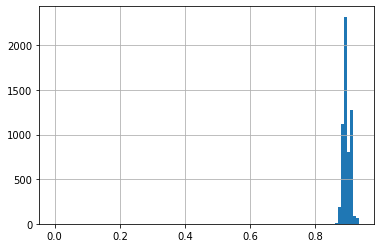

In [41]:
one = pf[PWP1+'_PowerFactor']
one.hist(bins= 100)

Index(['EM_SUB3_3_PowerFactor'], dtype='object')


array([[<AxesSubplot:title={'center':'EM_SUB3_3_PowerFactor'}>]],
      dtype=object)

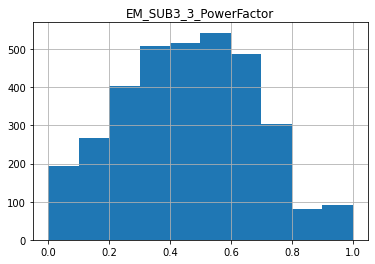

In [28]:
two = pd.DataFrame(pf[PWP2+'_PowerFactor'])
print(two.columns)
two = two.drop(two[two[PWP2 + '_PowerFactor']<0].index)
two.hist()